# ESS330 Yellowstone Project

Sammy Tetrault (CSU)  
Zoe Gagalis (CSU)  
Zoe Ellis (CSU)  
April 10, 2025

## Introduction

Wolf reintroduction after their nearly 70-year absence in Yellowstone National Park has been one of the most highly monitored, discussed, and debated wildlife restoration efforts in recent decades. Following the reintroduction of the wolves (Canis lupus) to this part of Wyoming as a wildlife conservation effort, there have been noticeable changes to surrounding ecosystems, including other mammal populations such as bison and elk, as well as plant populations such as willows and other riparian vegetation within the national park ([Ripple & Beschta, 2012](#ref-ripple2012)). With how extensive this research is presented, as well as how long the study has gone on for, our goal is to zoom in on aspects regarding the predator/prey relationship and its overall effect on Yellowstone. Our project, which will have a primary focus on species population dynamics and trends, will aim to understand and explain these impacts and how trophic cascades can have an enormous and lasting impact on ecosystems. Importantly, these effects are not always straightforwardly positive or negative. While wolf reintroduction has supported the regrowth of riparian habitats and enhanced biodiversity in some areas, it has also shifted the dynamics of competition among prey species and changed the structure of Yellowstone’s food webs. By exploring how these interactions evolve over time, we aim to highlight the multifaceted and interconnected nature of ecosystem responses to change. The project and analysis will focus on how these trophic interactions can change, help, and hinder surrounding habitats, ecosystems, and food webs. We suspect that the analysis of the data we have gathered on wolf reintroduction in the park regarding species population counts will reveal dramatic changes in the populations of both elk and bison, and will illustrate how bringing wolves back to this area creates cascading impacts on the entire ecosystem, by demonstrating how wolves impact two species who have existed in Yellowstone without any natural predators for many years. It is likely that elk will show a steep decreasing trend after wolf reintroduction, as their population was largely uncontrolled for several decades and allowed to explode to high numbers ([Metz et al., 2016](#ref-metz2016)). Bison, which are naturally less vulnerable to predators, will likely respond differently in regards to population numbers, as the decreasing number of elk allows the bison to live in an area where there is now less competition for resources with other species ([Smith et al., 2000](#ref-smith2000)). Through our data analysis, we aim to show the indirect effects of this major change, and we hope to be able to create an easily palatable and understandable reference for people like us, who are otherwise removed from these issues. By making this information more digestible, we hope for our audience to gain a broader understanding of this issue and why it is important to understand trophic dynamics within the ecosystems that we know and love. Additionally, since Colorado has been experimenting with wolf reintroduction since 2023, an action that has been met with widespread controversy and criticism, we hope that our analysis of these impacts will help Coloradans better understand the impacts of bringing the wolf population back to its native habitat. While this conservation initiative has been controversial for many residents in surrounding areas, we hope to help provide a better understanding of why it was done, its impacts, and the importance of efforts like this one.

## Data Exploration

#### Data Description

The data that we are looking at comes from a study conducted by David Cooper and Tom Hobbs of Colorado State University. Their study investigated Salix height as a response to browsing and the water table ([Cooper & Hobbs, 2023](#ref-cooper)).For our study, we are interested in the relationship between wolf population count and grazer population counts (elk and bison). The first dataset that we are using is a bison data csv which includes date, population count, adult count, and calf count. The second dataset is a wolf data csv which includes site, year, and population count. The third dataset is an elk data csv which includes year, mean population count, and upper and lower confidence intervals.

#### Opening the data

In [ ]:
library(readr)

library(here)

here() starts at C:/Users/sammy/OneDrive/Desktop/ESS330/ESS330-Yellowstone-Project

Rows: 66 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): date
dbl (2): year, calves
num (2): total, adults

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 34 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (4): year, mean, lwrCL, uprCL

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 3 Columns: 28
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Site
dbl (27): 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

#### Cleaning the data

In [ ]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

#### Visualizing the data

ℹ Please use the `linewidth` argument instead.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'

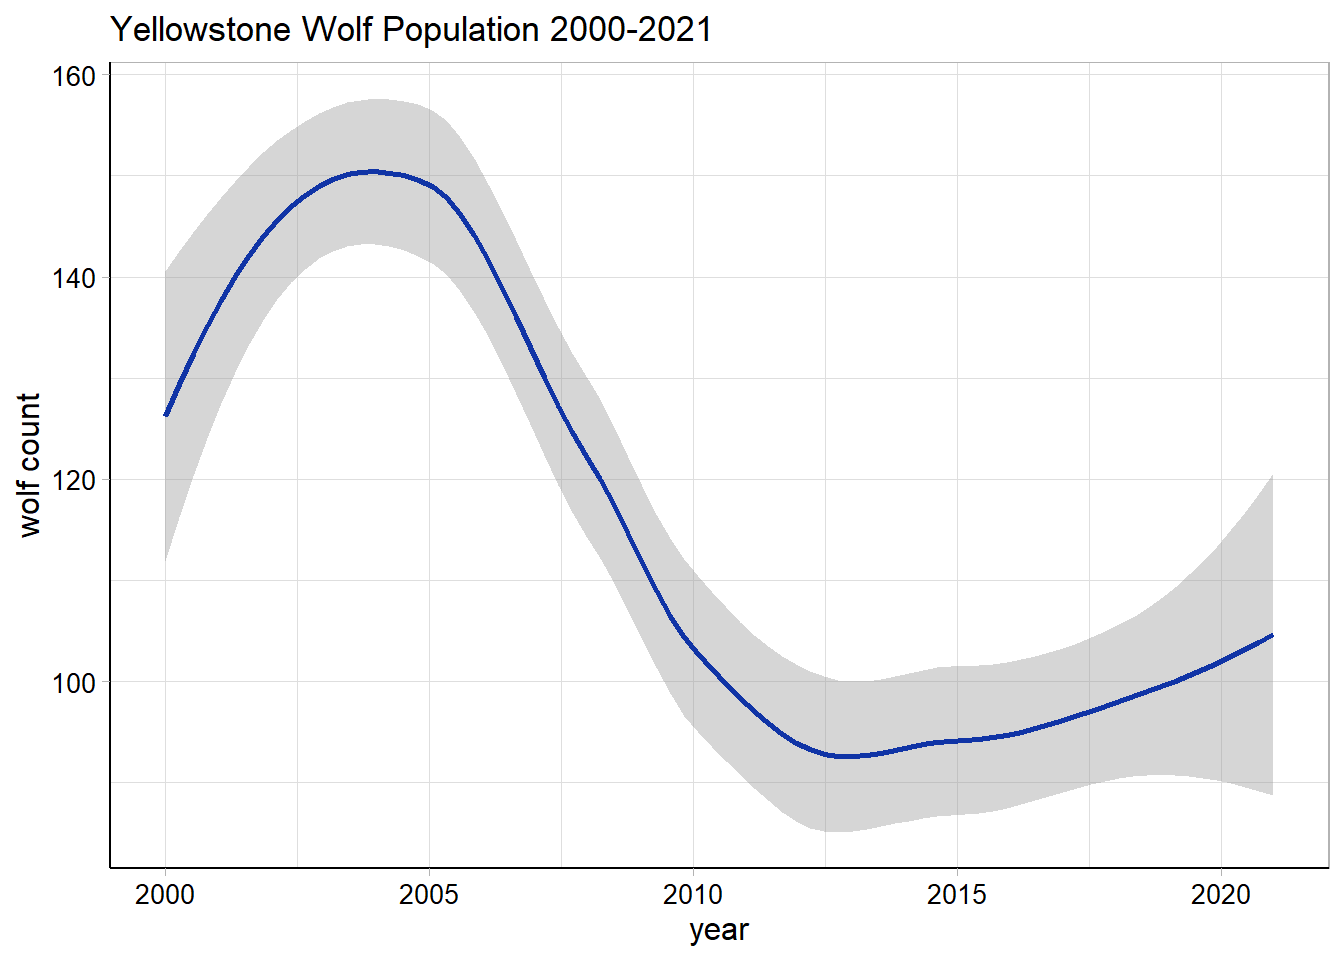

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'

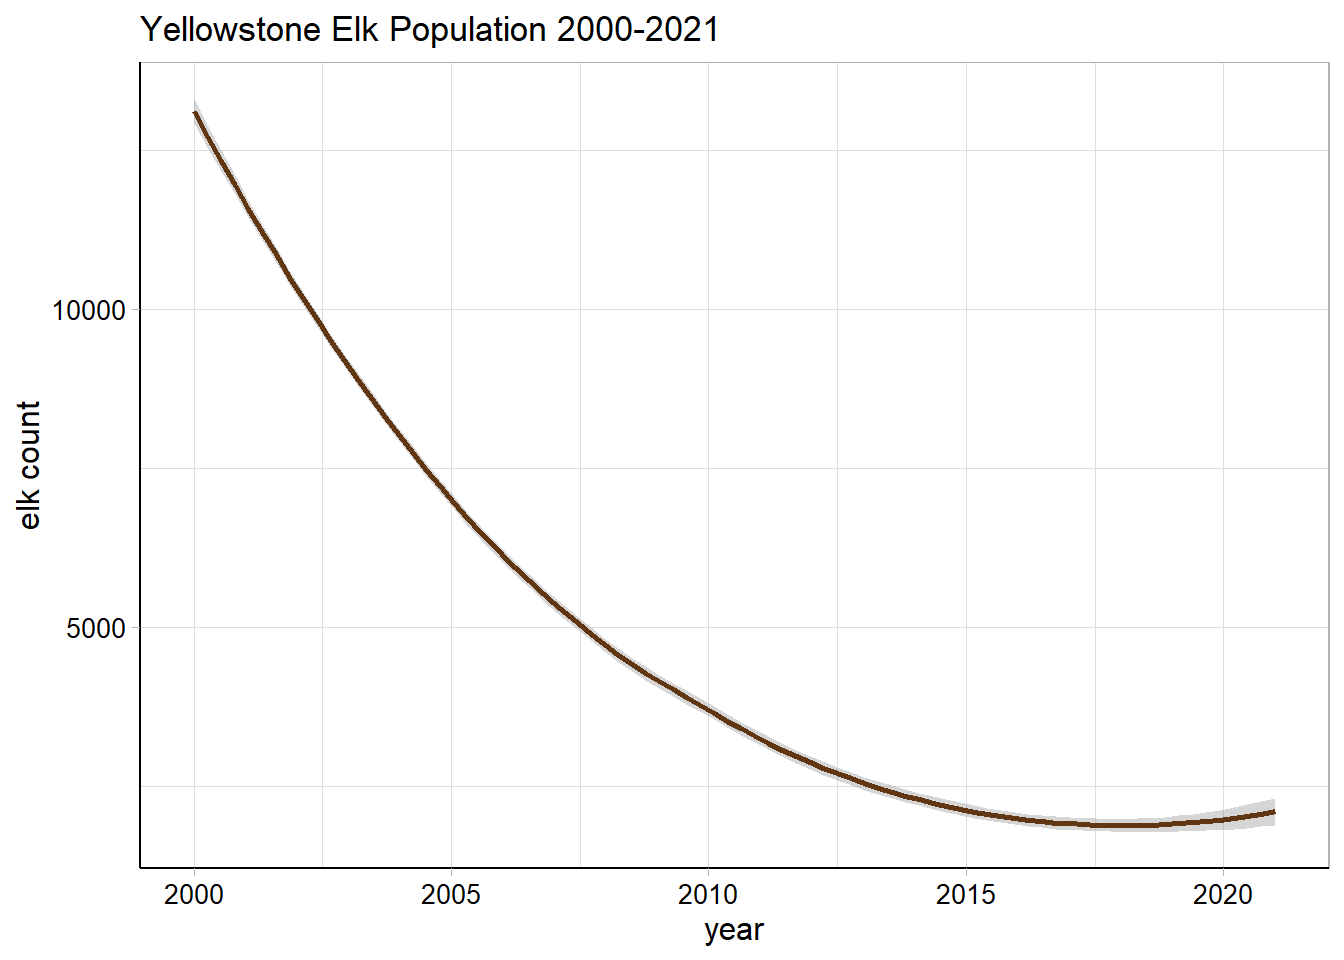

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'

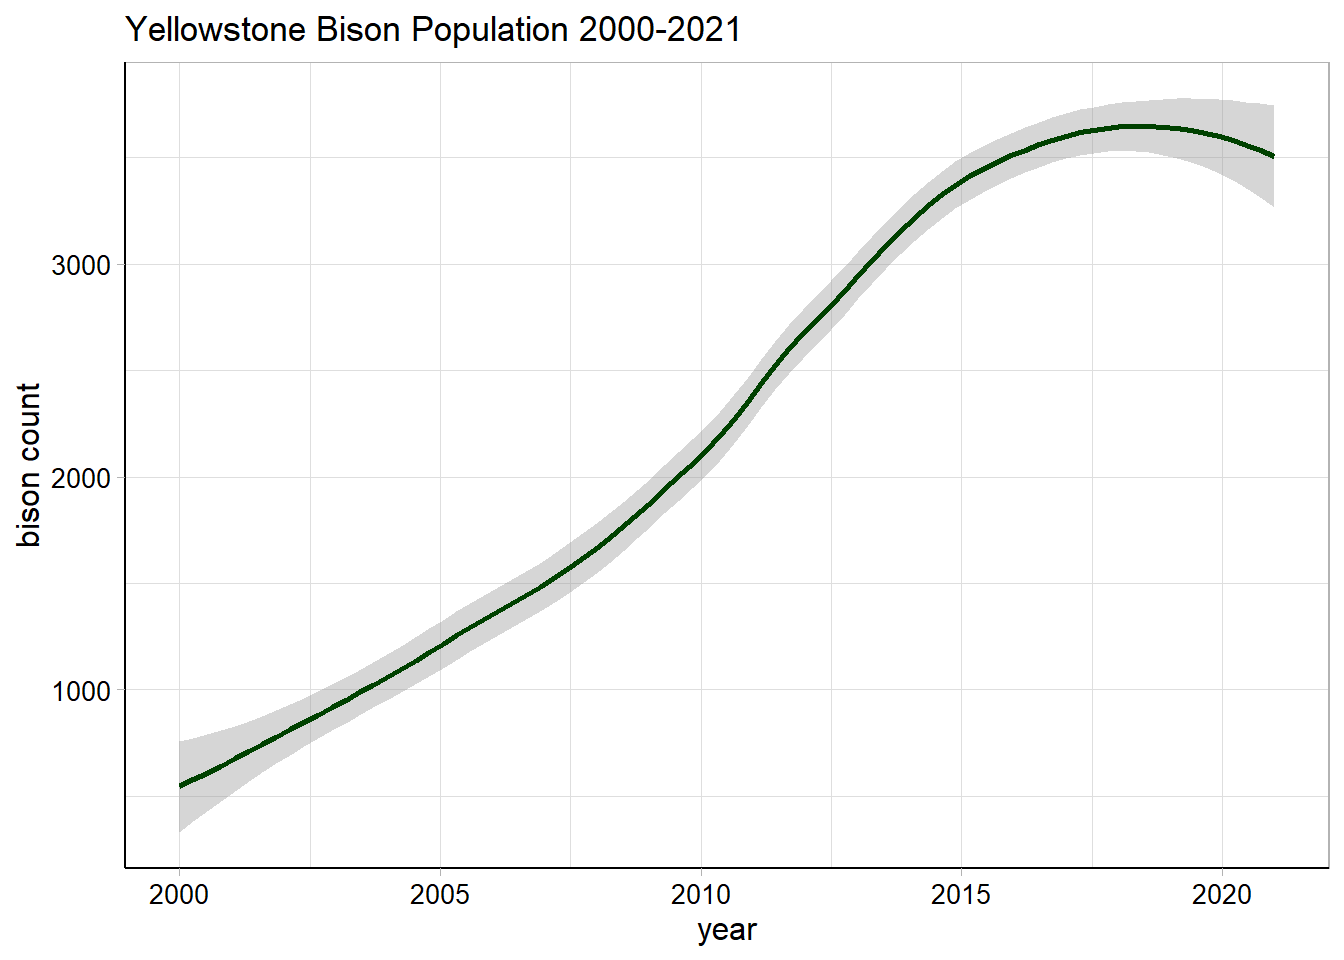

In [ ]:
library(ggplot2)

wolf_pop_plot = ggplot(data = data, aes(x = year, y = wolf_count)) +
  geom_smooth(color = "#1034A6") +
  labs(title = "Yellowstone Wolf Population 2000-2021",
       x = "year",
       y = "wolf count") +
  theme_light() +
# making axes nicely visible
  theme(axis.title.x = element_text(size = 12),
        axis.title.y = element_text(size = 12),
        axis.text.x = element_text(size = 10, color = "black"),
        axis.text.y = element_text(size = 10, color = "black"),
        axis.line = element_line(color = "black", size = 0.5))

#### Testing the data

First we tested the wolf count data for normality using the Shapiro-Wilk test. This test had a p-value of 5.507e-06, indicating that we should reject the null. The null of this test is that the data is normal, thus this indicates that the wolf population data is not normal.

In [ ]:
shapiro.test(data$wolf_count)


    Shapiro-Wilk normality test

data:  data$wolf_count
W = 0.86479, p-value = 5.507e-06

Next, we tested the elk count data using the same test. Again, the p-value was highly significant(2.789e-07). This indicates that the elk population data is also not normal.

In [ ]:
shapiro.test(data$elk_count)


    Shapiro-Wilk normality test

data:  data$elk_count
W = 0.82078, p-value = 2.789e-07

Lastly, we tested the bison count data using the same test. Once again, the p-value was highly significant(0.0005066). This suggests that the bison population data is also not normal.

In [ ]:
shapiro.test(data$bison_count)


    Shapiro-Wilk normality test

data:  data$bison_count
W = 0.91907, p-value = 0.0005066

The next test we ran was a QQ test. We generated QQ plots for each population count and from looking at the plots found that while the populations do tend to follow the normal distribution line, there are deviations for all three groups, suggesting non-normality.


Attaching package: 'ggpubr'

The following objects are masked from 'package:flextable':

    border, font, rotate

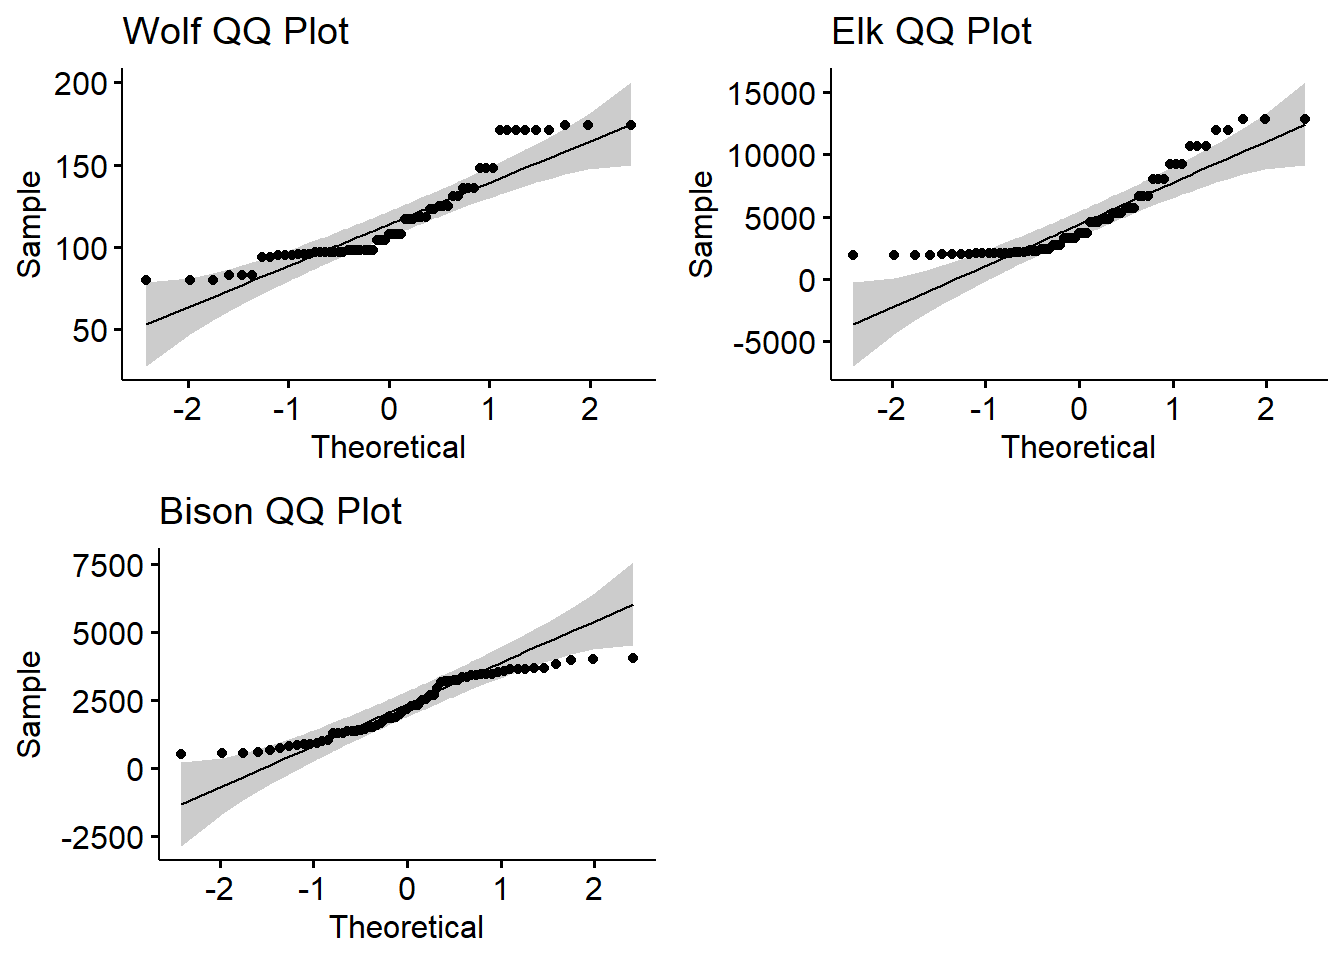

In [ ]:
# wolf qqplot
library(ggpubr)

## Preliminary Methods

To analyze this data, we will be doing data exploration using methods such as ANOVA, t-testing, and generating finalized plots. We will be comparing the raw files of annual elk populations and bison populations from 1970 to 2015, which will provide a strong background comparison for time frames both before and after wolf reintroduction, to help us better understand how the ecosystem was established fully before, during, and after this major change. This time frame will provide a sufficient comparison of the effects wolves had when they were introduced. We will begin our analysis with exploratory data techniques, including basic descriptive statistics and visualizations to observe general trends and outliers. From there, we will employ statistical methods such as ANOVA and t-tests to determine whether the changes in population means before and after wolf reintroduction are statistically significant. These methods will help us assess the differences in trends between elk and bison, two species with contrasting responses to wolf predation. Additionally, we will generate visual representations—such as line graphs and bar plots—to display population fluctuations over time. These visualizations will not only help us interpret the data more clearly but will also serve as an effective communication tool for presenting our findings to non-expert audiences. We expect these plots to highlight a decline in elk populations following 1995 and a relatively stable or increasing trend in bison numbers, supporting our hypothesis regarding species-specific predator responses. Given the extensive data there won’t be a need for supplemental material, but this could also pose a challenge when handling such large files. Our selected methods will allow us to compare 2 different prey populations over the same period of time. We hope to see a visual representation of how the introduction affected these populations, and how it also compares to their growth before. By comparing the population trajectories of elk and bison over the same time period and in the same ecological context, we hope to develop a clearer understanding of how apex predators like wolves influence ecosystem structure—not just through direct predation, but through broader cascading effects.

Cooper, D., & Hobbs, N. (2023). Twenty years of salix height in response to experimental manipulation of browsing and water table, northern range of yellowstone national park. *Dryad, Dataset. Https://Doi. Org/10.5061/Dryad. Sqv9s4n7n*.

Metz, M., Smith, D., Stahler, D., Vucetich, J., & Peterson, R. (2016). Temporal variation in wolf predation dynamics in yellowstone: Lessons learned from two decades of research. *Yellowstone Science*, *24*, 55–60.

Ripple, W. J., & Beschta, R. L. (2012). Trophic cascades in yellowstone: The first 15 years after wolf reintroduction. *Biological Conservation*, *145*, 205–213. [https://doi.org/10.1016/j.biocon.2011.11.005. (https://www.sciencedirect.com/science/article/pii/S0006320711004046)](https://doi.org/10.1016/j.biocon.2011.11.005.
(https://www.sciencedirect.com/science/article/pii/S0006320711004046))

Smith, D. W., Mech, L. D., Meagher, M., Clark, W. E., Jaffe, R., Phillips, M. K., & Mack, J. A. (2000). Wolf–bison interactions in yellowstone national park. *Journal of Mammalogy*, *81*(4), 1128–1135.